In [207]:
import time

import pandas as pd
import matplotlib.pyplot as plt

Gathering data about football players from Central Europe with posibility to add new leagues.

In [208]:
df_overall_data = pd.read_csv("./data/data.csv", encoding='cp1250')
df_bio = pd.read_csv("./data/players_bio_data.csv", encoding='cp1250')

In [209]:
df_overall_data.head()

,team_name,league,country,player_name,player_url,player_pos,player_age,nationality,in_squad,appearances,goals,minutes_played
0,Rakow Czestochowa,PKO Ekstraklasa,Poland,Vladan Kovacevic,https://www.transfermarkt.com/vladan-kovacevic...,Goalkeeper,24.0,Bosnia-Herzegovina,23,21,0,1920
1,Rakow Czestochowa,PKO Ekstraklasa,Poland,Kacper Trelowski,https://www.transfermarkt.com/kacper-trelowski...,Goalkeeper,19.0,Poland,28,8,0,720
2,Rakow Czestochowa,PKO Ekstraklasa,Poland,Xavier Dziekonski,https://www.transfermarkt.com/xavier-dziekonsk...,Goalkeeper,19.0,Poland,4,0,0,0
3,Rakow Czestochowa,PKO Ekstraklasa,Poland,Jakub Rajczykowski,https://www.transfermarkt.com/jakub-rajczykows...,Goalkeeper,18.0,Poland,8,0,0,0
4,Rakow Czestochowa,PKO Ekstraklasa,Poland,Stratos Svarnas,https://www.transfermarkt.com/stratos-svarnas/...,Centre-Back,25.0,Greece,29,24,3,2182


In [210]:
df_bio.head()

,player_name,name_in_home_country,date_of_birth,place_of_birth,age,height,citizenship,position,foot,player_agent,...,on_loan_from,contract_there_expires,twitter,facebook,x2nd_club,full_name,website,x3nd_club,x4nd_club,date_of_death
0,Vladan Kovacevic,Vladan Kovačević,1998-04-11,Banja Luka,24.0,1.92,Bosnia-Herzegovina Serbia,Goalkeeper,right,firsteleven ISM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kacper Trelowski,Kacper Trelowski,2003-08-19,Częstochowa,19.0,1.93,Poland,Goalkeeper,both,INNfootball,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Xavier Dziekonski,Xavier Dziekoński,2003-10-06,Grajewo,19.0,1.88,Poland,Goalkeeper,right,BMG-SPORT,...,Rakow Czestochowa,"Jun 30, 2025",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Jakub Rajczykowski,NaN,2005-02-04,NaN,18.0,NaN,Poland,Goalkeeper,NaN,KFM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Stratos Svarnas,<U+03A3><U+03C4><U+03C1><U+03AC><U+03C4><U+03B...,1997-11-11,Athen,25.0,1.86,Greece,Defender - Centre-Back,right,P&P Sport Management S.A.M.,...,AEK Athens,"Jun 30, 2025",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [211]:
df_overall_data.shape[0], df_bio.shape[0]

(6727, 6650)

In [212]:
df = pd.merge(df_overall_data, df_bio, how="left", on=["player_name"])
player_url = df["player_url"]

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7641 entries, 0 to 7640
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   team_name                        7641 non-null   object 
 1   league                           7641 non-null   object 
 2   country                          7641 non-null   object 
 3   player_name                      7641 non-null   object 
 4   player_url                       7641 non-null   object 
 5   player_pos                       7641 non-null   object 
 6   player_age                       7620 non-null   float64
 7   nationality                      7641 non-null   object 
 8   in_squad                         7641 non-null   int64  
 9   appearances                      7641 non-null   int64  
 10  goals                            7641 non-null   int64  
 11  minutes_played                   7641 non-null   int64  
 12  name_in_home_country

In [214]:
df.head()

,team_name,league,country,player_name,player_url,player_pos,player_age,nationality,in_squad,appearances,...,on_loan_from,contract_there_expires,twitter,facebook,x2nd_club,full_name,website,x3nd_club,x4nd_club,date_of_death
0,Rakow Czestochowa,PKO Ekstraklasa,Poland,Vladan Kovacevic,https://www.transfermarkt.com/vladan-kovacevic...,Goalkeeper,24.0,Bosnia-Herzegovina,23,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rakow Czestochowa,PKO Ekstraklasa,Poland,Kacper Trelowski,https://www.transfermarkt.com/kacper-trelowski...,Goalkeeper,19.0,Poland,28,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Rakow Czestochowa,PKO Ekstraklasa,Poland,Xavier Dziekonski,https://www.transfermarkt.com/xavier-dziekonsk...,Goalkeeper,19.0,Poland,4,0,...,Rakow Czestochowa,"Jun 30, 2025",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Rakow Czestochowa,PKO Ekstraklasa,Poland,Jakub Rajczykowski,https://www.transfermarkt.com/jakub-rajczykows...,Goalkeeper,18.0,Poland,8,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rakow Czestochowa,PKO Ekstraklasa,Poland,Stratos Svarnas,https://www.transfermarkt.com/stratos-svarnas/...,Centre-Back,25.0,Greece,29,24,...,AEK Athens,"Jun 30, 2025",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
df["player_name"] = df["player_url"].apply(
    lambda x: str(x).split("/")[3].replace("-", " ").title() if "transfermarkt" in str(x) else x)

In [216]:
# print(df["player_url"].unique())

In [217]:
df = df[['team_name',
         'league',
         'country',
         'player_name',
         'player_pos',
         'player_age',
         'nationality',
         'in_squad',
         'appearances',
         'goals',
         'minutes_played',
         'height',
         'foot',
         'player_agent',
         'joined',
         'contract_expires',
         'date_of_last_contract_extension',
         'outfitter',
         'player_valuation',
         'max_player_valuation',
         'max_player_valuation_date',
         'contract_option',
         'on_loan_from',
         'contract_there_expires']]
df["goals_per_game"] = df.goals / df.appearances

In [218]:
df.head()

,team_name,league,country,player_name,player_pos,player_age,nationality,in_squad,appearances,goals,...,contract_expires,date_of_last_contract_extension,outfitter,player_valuation,max_player_valuation,max_player_valuation_date,contract_option,on_loan_from,contract_there_expires,goals_per_game
0,Rakow Czestochowa,PKO Ekstraklasa,Poland,Vladan Kovacevic,Goalkeeper,24.0,Bosnia-Herzegovina,23,21,0,...,2026-06-30,2022-07-07,Uhlsport,5000000.0,5000000.0,2022-09-29,NaN,NaN,NaN,0.000
1,Rakow Czestochowa,PKO Ekstraklasa,Poland,Kacper Trelowski,Goalkeeper,19.0,Poland,28,8,0,...,2025-06-30,2022-02-15,adidas,NaN,NaN,2021-12-31,Option for a further year,NaN,NaN,0.000
2,Rakow Czestochowa,PKO Ekstraklasa,Poland,Xavier Dziekonski,Goalkeeper,19.0,Poland,4,0,0,...,2023-06-30,NaN,Nike,NaN,1500000.0,2021-05-21,NaN,Rakow Czestochowa,"Jun 30, 2025",NaN
3,Rakow Czestochowa,PKO Ekstraklasa,Poland,Jakub Rajczykowski,Goalkeeper,18.0,Poland,8,0,0,...,2025-06-30,NaN,NaN,NaN,NaN,2022-09-29,NaN,NaN,NaN,NaN
4,Rakow Czestochowa,PKO Ekstraklasa,Poland,Stratos Svarnas,Centre-Back,25.0,Greece,29,24,3,...,2023-06-30,NaN,NaN,2000000.0,2000000.0,2022-11-16,Option to buy,AEK Athens,"Jun 30, 2025",0.125


In [219]:
df.player_agent.unique()

array(['firsteleven ISM', 'INNfootball', 'BMG-SPORT', ...,
       'CWJ Genu Prima', 'Eurofoot4all', 'Sport Futbol'], dtype=object)

In [220]:
def position_name(x):
    pos_dict = {'Goalkeeper': 'GK',
                'Centre-Back': 'CB',
                'Attacking Midfield': 'AM',
                'Right Midfield': 'RM',
                'Defensive Midfield': 'DM',
                'Left Midfield': 'LM',
                'Central Midfield': 'CM',
                'Centre-Forward': 'CF',
                'Right-Back': 'RB',
                'Left-Back': 'LB',
                'Left Winger': 'LW',
                'Right Winger': 'RW',
                'midfield': 'CM',
                'Second Striker': 'SecST',
                'Attack': 'ST',
                'Defender': 'CB'}
    try:
        return pos_dict[x]
    except:
        return x

In [221]:
df["player_pos"] = df["player_pos"].apply(lambda x: position_name(x))

In [222]:
df.head()

,team_name,league,country,player_name,player_pos,player_age,nationality,in_squad,appearances,goals,...,contract_expires,date_of_last_contract_extension,outfitter,player_valuation,max_player_valuation,max_player_valuation_date,contract_option,on_loan_from,contract_there_expires,goals_per_game
0,Rakow Czestochowa,PKO Ekstraklasa,Poland,Vladan Kovacevic,GK,24.0,Bosnia-Herzegovina,23,21,0,...,2026-06-30,2022-07-07,Uhlsport,5000000.0,5000000.0,2022-09-29,NaN,NaN,NaN,0.000
1,Rakow Czestochowa,PKO Ekstraklasa,Poland,Kacper Trelowski,GK,19.0,Poland,28,8,0,...,2025-06-30,2022-02-15,adidas,NaN,NaN,2021-12-31,Option for a further year,NaN,NaN,0.000
2,Rakow Czestochowa,PKO Ekstraklasa,Poland,Xavier Dziekonski,GK,19.0,Poland,4,0,0,...,2023-06-30,NaN,Nike,NaN,1500000.0,2021-05-21,NaN,Rakow Czestochowa,"Jun 30, 2025",NaN
3,Rakow Czestochowa,PKO Ekstraklasa,Poland,Jakub Rajczykowski,GK,18.0,Poland,8,0,0,...,2025-06-30,NaN,NaN,NaN,NaN,2022-09-29,NaN,NaN,NaN,NaN
4,Rakow Czestochowa,PKO Ekstraklasa,Poland,Stratos Svarnas,CB,25.0,Greece,29,24,3,...,2023-06-30,NaN,NaN,2000000.0,2000000.0,2022-11-16,Option to buy,AEK Athens,"Jun 30, 2025",0.125


In [223]:
df_RKS = df.query("team_name == 'Rakow Czestochowa'")

<AxesSubplot: >

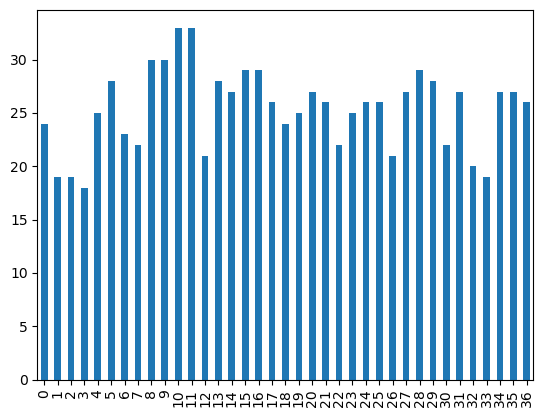

In [224]:
df_RKS["player_age"].plot(kind='bar')

In [225]:
df_RKS["player_age"].mean()

25.35135135135135

In [226]:
starting_eleven = df_RKS.sort_values(by="minutes_played", ascending=False)[:11]

In [227]:
starting_eleven["player_age"].min(), starting_eleven["player_age"].max()

(24.0, 30.0)

In [228]:
df_RKS.groupby(by="player_pos").count()["team_name"]

player_pos
AM    8
CB    9
CF    3
CM    5
DM    2
GK    4
LM    3
RM    3
Name: team_name, dtype: int64

In [229]:
df_RKS.groupby(by="nationality").count()["team_name"]

nationality
Bosnia-Herzegovina     1
Croatia                2
Czech Republic         1
Georgia                1
Greece                 2
Latvia                 1
Poland                20
Portugal               1
Romania                2
Serbia                 1
Spain                  3
Sweden                 1
Ukraine                1
Name: team_name, dtype: int64

In [230]:
df.groupby(by="nationality").count().sort_values("player_name", ascending=False)[:11]["player_name"]

nationality
Serbia                834
Croatia               539
Czech Republic        529
Greece                494
Bosnia-Herzegovina    455
Montenegro            440
Poland                435
Bulgaria              414
North Macedonia       409
Slovakia              374
Albania               336
Name: player_name, dtype: int64

<h3>Let's add players' coutries population to our data set!

In [231]:
print(df.nationality.unique().tolist())

['Bosnia-Herzegovina', 'Poland', 'Greece', 'Croatia', 'Romania', 'Czech Republic', 'Serbia', 'Spain', 'Ukraine', 'Sweden', 'Portugal', 'Georgia', 'Latvia', 'Slovakia', 'Scotland', 'Norway', "Cote d'Ivoire", 'Mauritius', 'Israel', 'Germany', 'Albania', 'Kosovo', 'Slovenia', 'Brazil', 'Austria', 'Armenia', 'Iran', 'Finland', 'Denmark', 'North Macedonia', 'Japan', 'Senegal', 'Lithuania', 'France', 'Colombia', 'The Gambia', 'Cameroon', 'Switzerland', 'Netherlands', 'Turkey', 'Mali', 'Bulgaria', 'England', 'Hungary', 'Estonia', 'Azerbaijan', 'Belgium', 'Iceland', 'Guinea-Bissau', 'DR Congo', 'South Africa', 'Cape Verde', 'Dominican Republic', 'Curacao', 'Montenegro', 'Mexico', 'Argentina', 'Chile', 'Canada', 'Belarus', 'Liberia', 'Nigeria', 'Australia', 'Benin', 'Angola', 'Iraq', 'Russia', 'Korea, South', 'Malaysia', 'Ghana', 'Martinique', 'Guinea', 'United States', 'Suriname', 'Venezuela', 'Panama', 'Congo', 'Syria', 'Moldova', 'Cyprus', 'Indonesia', 'Central African Republic', 'Morocco', 

In [232]:
population_dict = {'Bosnia-Herzegovina': 3280819, 'Poland': 37950802, 'Greece': 10473455, 'Croatia': 4087843,
                   'Romania': 19237682, 'Czech Republic': 10724567, 'Serbia': 6908224, 'Spain': 46754778,
                   'Ukraine': 43733762, 'Sweden': 10160115, 'Portugal': 10191409, 'Georgia': 3989167, 'Latvia': 1901548,
                   'Slovakia': 5457013, 'Scotland': 5463300, 'Norway': 5421241, "Cote d'Ivoire": 26378274,
                   'Mauritius': 1265577, 'Israel': 8891800, 'Germany': 83240525, 'Albania': 2854191, 'Kosovo': 1791034,
                   'Slovenia': 2079976, 'Brazil': 212559417, 'Austria': 8917205, 'Armenia': 2963243, 'Iran': 84571111,
                   'Finland': 5540720, 'Denmark': 5822763, 'North Macedonia': 2083374, 'Japan': 126050000,
                   'Lithuania': 2722289, 'France': 67391582, 'The Gambia': 2347706, 'Cameroon': 26545864,
                   'Switzerland': 8715866, 'Netherlands': 17173000, 'Turkey': 84339067, 'Mali': 20250834,
                   'Bulgaria': 6975761, 'England': 56286961, 'Hungary': 9764000, 'Estonia': 1321977,
                   'Azerbaijan': 10139177, 'Iceland': 341243, 'Belgium': 11556247, 'Guinea-Bissau': 1968001,
                   'DR Congo': 101780263, 'South Africa': 59966000, 'Cape Verde': 549935, 'Colombia': 50339443,
                   'Dominican Republic': 10738958, 'Curacao': 157538, 'Montenegro': 628066, 'Mexico': 130222815,
                   'Argentina': 45605822, 'Chile': 19116209, 'Canada': 38131104, 'Belarus': 9417849, 'Liberia': 5057681,
                   'Nigeria': 200963599, 'Australia': 25499881, 'Benin': 12123200, 'Senegal': 15854360,
                   'Angola': 31825295, 'Iraq': 40222493, 'Russia': 144373535, 'Korea, South': 51269185,
                   'Malaysia': 32722760, 'Ghana': 30417856, 'Martinique': 375673, 'Guinea': 12771246,
                   'United States': 332915073, 'Suriname': 597927, 'Morocco': 36471769, 'Panama': 4246439,
                   'Congo': 5380508, 'Wales': 3139000, 'Venezuela': 28515829, 'Moldova': 2657637, 'Cyprus': 1207359,
                   'Niger': 24566000, 'Burkina Faso': 20903000, 'Burundi': 12256000, 'Tunisia': 11935000,
                   'Honduras': 10097000, 'Luxembourg': 633000, 'Italy': 60483000, 'Comoros': 877000,
                   'China': 1411778724, 'Uruguay': 3477000, 'Algeria': 44616626, 'Togo': 8279000, 'Jamaica': 2963000,
                   'Kenya': 52574000, 'Gabon': 2172900, 'Zambia': 18978000, 'Mauritania': 4643000,
                   'Solomon Islands': 686000, 'Southern Sudan': 10980000, 'Tanzania': 59632000,
                   'Central African Republic': 4829000, 'Haiti': 11402000, 'Tajikistan': 9576000, 'Palestine': 4981000,
                   'Mozambique': 31255000, 'Madagascar': 28020000, 'Costa Rica': 5094000, 'Uganda': 44517000,
                   'Libya': 6871300, 'Sierra Leone': 7977000, 'Egypt': 102334000, 'Trinidad and Tobago': 1390000,
                   'Paraguay': 7132530, 'Saudi Arabia': 34814000, 'New Zealand': 4987000, 'Syria': 17502000,
                   'Indonesia': 273523615, 'Bolivia': 11633000, 'Saint-Martin': 38666, 'Jordan': 10269416}

In [233]:
df["player_population"] = df["nationality"].apply(lambda x: population_dict[x] if x in population_dict.keys() else None)

In [234]:
df_greece = df.query("country=='Greece'")

In [235]:
df_greece.describe().T

,count,mean,std,min,25%,50%,75%,max
player_age,838.0,2.547494e+01,4.808517e+00,15.00,22.00,25.00,2.900000e+01,3.900000e+01
in_squad,839.0,1.341597e+01,8.111236e+00,0.00,6.00,15.00,1.900000e+01,3.700000e+01
appearances,839.0,1.020858e+01,8.060666e+00,0.00,2.00,10.00,1.700000e+01,3.500000e+01
goals,839.0,7.759237e-01,1.732696e+00,0.00,0.00,0.00,1.000000e+00,1.500000e+01
minutes_played,839.0,6.674553e+02,6.273579e+02,0.00,75.00,510.00,1.189000e+03,2.796000e+03
height,761.0,1.809947e+00,6.752191e-02,1.64,1.76,1.81,1.860000e+00,1.990000e+00
player_valuation,140.0,2.680714e+06,1.958045e+06,1000000.00,1300000.00,2000000.00,3.500000e+06,1.200000e+07
max_player_valuation,266.0,5.071805e+06,8.192115e+06,1000000.00,1500000.00,2500000.00,5.000000e+06,8.000000e+07
goals_per_game,710.0,6.180443e-02,1.168255e-01,0.00,0.00,0.00,8.605072e-02,1.000000e+00
player_population,839.0,2.583465e+07,4.522626e+07,38666.00,10473455.00,10473455.00,1.717300e+07,3.329151e+08


In [236]:
filtered_greece = df_greece[["player_name", "goals", "appearances", "goals_per_game", "player_age", "player_valuation",
                             "max_player_valuation"]].query("goals>=8")

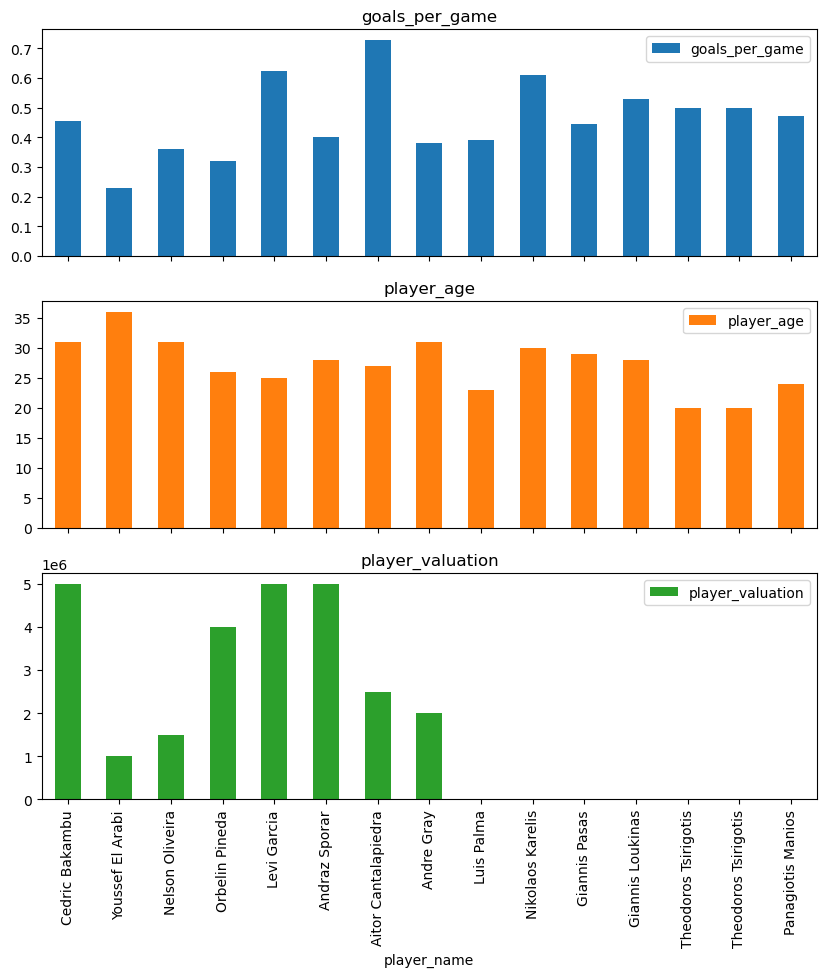

In [237]:
filtered_greece.plot(kind="bar", x="player_name", y=["goals_per_game", "player_age", "player_valuation"], subplots=True,
                     figsize=(10, 10))
plt.show()

In [238]:
df.query("player_age<25 and goals_per_game>0.5 and appearances>5")


,team_name,league,country,player_name,player_pos,player_age,nationality,in_squad,appearances,goals,...,date_of_last_contract_extension,outfitter,player_valuation,max_player_valuation,max_player_valuation_date,contract_option,on_loan_from,contract_there_expires,goals_per_game,player_population
779,AC Sparta Prague,Fortuna Liga,Czech Republic,Tomas Cvancara,CF,22.0,Czech Republic,19,19,10,...,2023-01-26,NaN,2000000.0,2000000.0,2022-12-14,NaN,NaN,NaN,0.526316,10724567
878,FC Banik Ostrava,Fortuna Liga,Czech Republic,Ladislav Almasi,CF,23.0,Slovakia,9,9,5,...,NaN,NaN,1700000.0,1700000.0,2022-06-22,NaN,NaN,NaN,0.555556,5457013
1405,DAC Dunajska Streda,Fortuna Liga,Slovakia,Nikola Krstovic,CF,22.0,Montenegro,26,26,19,...,NaN,Nike,1000000.0,1000000.0,2022-12-16,NaN,NaN,NaN,0.730769,628066
1446,Spartak Trnava,Fortuna Liga,Slovakia,Abdulrahman Taiwo,CF,24.0,Nigeria,12,12,7,...,NaN,NaN,NaN,NaN,2021-10-06,NaN,SönderjyskE,"Jun 30, 2025",0.583333,200963599
1551,AS Trencin,Fortuna Liga,Slovakia,Chinonso Emeka,CF,21.0,Nigeria,6,6,4,...,NaN,NaN,NaN,NaN,2021-06-07,NaN,NaN,NaN,0.666667,200963599
1594,FK Zeleziarne Podbrezova,Fortuna Liga,Slovakia,Moses David Cobnan,RW,20.0,Nigeria,21,21,14,...,NaN,NaN,NaN,NaN,2022-12-16,NaN,NaN,NaN,0.666667,200963599
2344,SK Sturm Graz,Bundesliga,Austria,Rasmus Hojlund,CF,20.0,Denmark,8,8,6,...,NaN,NaN,15000000.0,15000000.0,2022-09-27,NaN,NaN,NaN,0.750000,5822763
2384,LASK,Bundesliga,Austria,Keito Nakamura,LW,22.0,Japan,20,20,12,...,2022-08-16,NaN,4000000.0,4000000.0,2022-11-10,NaN,NaN,NaN,0.600000,126050000
2385,LASK,Bundesliga,Austria,Marin Ljubicic,CF,20.0,Croatia,19,19,13,...,2022-12-23,NaN,3500000.0,3500000.0,2022-11-10,NaN,NaN,NaN,0.684211,4087843
2754,NK Maribor,Prva Liga,Slovenia,Zan Vipotnik,CF,20.0,Slovenia,30,23,12,...,NaN,NaN,NaN,NaN,2022-12-15,NaN,NaN,NaN,0.521739,2079976


In [239]:
# df = df_overall_data
# df.query("player_name=='Rasmus Hojlund'")

<h3>Data from fbref

In [240]:
# fbref_data = pd.DataFrame()
# for url in pd.read_csv("./data/all_clubs_fbref.csv")["x"].tolist():
#     fbref_data = pd.concat([fbref_data,pd.read_html(url)[0]])
#     time.sleep(5)
# fbref_data.columns = fbref_data.columns.droplevel()

In [241]:
# fbref_data.head()

In [242]:
# fbref_data.shape

In [243]:
# fbref_data.to_csv("./data/fbref_data.csv", index=False)

In [244]:
fbref_data = pd.read_csv("./data/fbref_data.csv")

In [245]:
from unidecode import unidecode

fbref_data["Player"] = fbref_data["Player"].apply(lambda x: unidecode(x))

In [281]:
fbref_data.columns

Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'PrgC', 'PrgP',
       'PrgR', 'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1', 'G+A-PK', 'Matches',
       'MP.1'],
      dtype='object')

In [271]:
merged_data = pd.merge(df, fbref_data[["Player", "Ast"]], how="left", left_on="player_name", right_on="Player")

In [272]:
# merged_data.drop(columns=["Player", "Nation", "Pos", "Age", "Matches", "MP.1", "Min", "90s", 'outfitter'], inplace=True)
merged_data.drop(columns=["Player"], inplace=True)

In [273]:
merged_data.query("player_age<27 and goals_per_game>0.4 and appearances>5 and height>1.84").sort_values(by="player_valuation")

,team_name,league,country,player_name,player_pos,player_age,nationality,in_squad,appearances,goals,...,outfitter,player_valuation,max_player_valuation,max_player_valuation_date,contract_option,on_loan_from,contract_there_expires,goals_per_game,player_population,Ast
1605,DAC Dunajska Streda,Fortuna Liga,Slovakia,Nikola Krstovic,CF,22.0,Montenegro,26,26,19,...,Nike,1000000.0,1000000.0,2022-12-16,NaN,NaN,NaN,0.730769,628066,NaN
5681,Botev Plovdiv,efbet Liga,Bulgaria,Antoine Baroan,CF,22.0,France,19,19,10,...,NaN,1000000.0,1000000.0,2022-11-28,NaN,NaN,NaN,0.526316,67391582,0.0
652,Stal Mielec,PKO Ekstraklasa,Poland,Said Hamulic,CF,22.0,Bosnia-Herzegovina,19,19,9,...,NaN,1500000.0,1500000.0,2022-11-16,NaN,NaN,NaN,0.473684,3280819,2.0
1105,SK Sigma Olomouc,Fortuna Liga,Czech Republic,Mojmir Chytil,CF,23.0,Czech Republic,22,22,9,...,NaN,1500000.0,1500000.0,2022-12-14,NaN,NaN,NaN,0.409091,10724567,1.0
4602,FK Čukarički,Super liga Srbije,Serbia,Mohamed Badamosi,CF,24.0,The Gambia,26,25,11,...,NaN,1500000.0,1500000.0,2022-11-18,NaN,KV Kortrijk,"Jun 30, 2024",0.440000,2347706,NaN
4992,FK Radnicki Nis,Super liga Srbije,Serbia,Nikola Stulic,CF,21.0,Serbia,23,23,12,...,NaN,1500000.0,1500000.0,2022-11-18,NaN,NaN,NaN,0.521739,6908224,0.0
986,FC Banik Ostrava,Fortuna Liga,Czech Republic,Ladislav Almasi,CF,23.0,Slovakia,9,9,5,...,NaN,1700000.0,1700000.0,2022-06-22,NaN,NaN,NaN,0.555556,5457013,0.0
855,AC Sparta Prague,Fortuna Liga,Czech Republic,Tomas Cvancara,CF,22.0,Czech Republic,19,19,10,...,NaN,2000000.0,2000000.0,2022-12-14,NaN,NaN,NaN,0.526316,10724567,2.0
3622,NK Lokomotiva Zagreb,SuperSport HNL,Croatia,Sandro Kulenovic,CF,23.0,Croatia,23,23,10,...,adidas,2000000.0,2000000.0,2022-06-06,NaN,GNK Dinamo Zagreb,"Jun 15, 2025",0.434783,4087843,5.0
3667,NK Osijek,SuperSport HNL,Croatia,Dion Beljo,CF,20.0,Croatia,19,19,9,...,NaN,6500000.0,6500000.0,2022-11-08,NaN,NaN,NaN,0.473684,4087843,NaN


In [280]:
merged_data.query("player_pos=='CB' and foot=='left' and height>1.87 and player_valuation<2_000_000").sort_values(by="player_valuation")

,team_name,league,country,player_name,player_pos,player_age,nationality,in_squad,appearances,goals,...,outfitter,player_valuation,max_player_valuation,max_player_valuation_date,contract_option,on_loan_from,contract_there_expires,goals_per_game,player_population,Ast
2493,Red Bull Salzburg,Bundesliga,Austria,Bryan Okoh,CB,19.0,Switzerland,0,0,0,...,NaN,1000000.0,1500000.0,2021-12-16,NaN,NaN,NaN,NaN,8715866,NaN
1995,Ferencvárosi TC,Nemzeti Bajnokság,Hungary,Mats Knoester,CB,24.0,Netherlands,32,28,0,...,NaN,1500000.0,1500000.0,2022-10-11,NaN,NaN,NaN,0.00,17173000,NaN
2693,Wolfsberger AC,Bundesliga,Austria,Luka Lochoshvili,CB,24.0,Georgia,4,4,0,...,NaN,1500000.0,1500000.0,2022-05-27,NaN,NaN,NaN,0.00,3989167,0.0
7455,PAOK Thessaloniki,Super League 1,Greece,Konstantinos Koulierakis,CB,19.0,Greece,22,20,1,...,adidas,1500000.0,1500000.0,2022-11-07,NaN,NaN,NaN,0.05,10473455,0.0
50,Lech Poznan,PKO Ekstraklasa,Poland,Antonio Milic,CB,28.0,Croatia,28,26,0,...,NaN,1800000.0,3000000.0,2018-03-30,Option for a further year,NaN,NaN,0.00,4087843,0.0
3695,HNK Gorica,SuperSport HNL,Croatia,Kresimir Krizmanic,CB,22.0,Croatia,21,21,0,...,NaN,1800000.0,1800000.0,2022-06-06,performance option,NaN,NaN,0.00,4087843,0.0
